In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import io
from pathlib import Path

In [11]:
def plot_xvg(file_content):
    """
    This function takes the contents of a .xvg file, processes them,
    and creates a plot of the contained data.
    """
    # Lists to hold data and metadata
    data_lines = []
    title = ""
    xaxis_label = ""
    yaxis_label = ""
    legends = []

    # Read each line of the file
    for line in file_content:
        # If the line is not a comment, add it to data
        if not line.startswith(('#', '@')):
            data_lines.append(line)
        # Extract plot metadata
        elif line.startswith('@'):
            parts = line.split('"')
            if 'title' in line:
                title = parts[1]
            elif 'xaxis' in line:
                xaxis_label = parts[1]
            elif 'yaxis' in line:
                yaxis_label = parts[1]
            elif 's' in line and 'legend' in line:
                legends.append(parts[1])

    # Use pandas to easily read the data into columns
    # Use an in-memory buffer (StringIO) to treat our strings as a file
    data_buffer = io.StringIO("".join(data_lines))
    
    # Create a DataFrame. `delim_whitespace=True` handles multiple spaces as separators.
    # There is no header row, so `header=None`.
    df = pd.read_csv(data_buffer, delim_whitespace=True, header=None)

    # Create the plot
    plt.figure(figsize=(10, 6))

    # Plot each data y-column (from the second onward) against the x-column (the first)
    for i in range(1, len(df.columns)):
        plt.plot(df[0], df[i], label=legends[i-1] if i-1 < len(legends) else f'Column {i}')
        
    # Apply metadata to the plot
    plt.title(title)
    plt.xlabel(xaxis_label)
    plt.ylabel(yaxis_label)
    
    # Add the legend
    plt.legend()
    
    # Enable grid for better readability
    plt.grid(True, linestyle='--', alpha=0.6)

    '''
    # Save figure in same directory as the .xvg file if available, otherwise current dir
    target_dir = p.parent if 'p' in globals() and p is not None else Path.cwd()
    # create a filesystem-safe filename from title (fallback to input file stem)
    if title and title.strip():
        fname_base = title.strip().split()
        fname_base = "_".join(fname_base[0:5])
    elif 'p' in globals() and p is not None:
        fname_base = p.stem
    else:
        fname_base = "plot"

    invalid_chars = '<>:"/\\|?*'
    safe_title = "".join("_" if ch in invalid_chars else ch for ch in fname_base).strip()

    if not safe_title:
        safe_title = p.stem if 'p' in globals() and p is not None else "plot"

    out_path = target_dir / f"{safe_title}.png"
    plt.savefig(out_path, dpi=300, bbox_inches='tight')
    print(f"Saved figure to: {out_path}")
    '''
    output_filename = p.with_suffix('.png')
    plt.savefig(output_filename, dpi=300, bbox_inches='tight')
    print(f"Plot saved as: {output_filename}")

    # Show the plot
    plt.show()

C:\Users\mfab9\AppData\Local\Temp\ipykernel_24632\989674734.py:36: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(data_buffer, delim_whitespace=True, header=None)


Plot saved as: X:\Projects\slowcinema\cine-sense\16-06-2025_lavoro_di_luigiiii\md-simulation-tutorial\session2_protein_simulation\3_results\RMSD_min.png


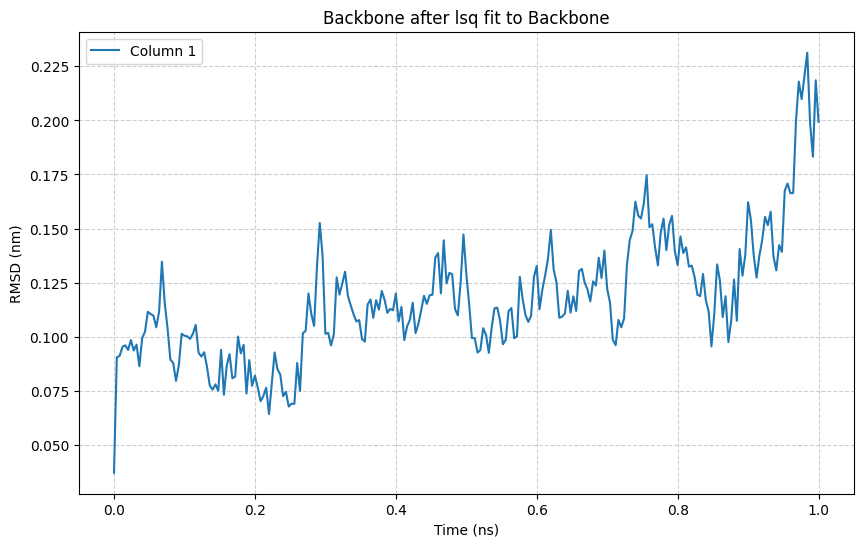

In [14]:
# main block
if __name__ == "__main__":
    file_path_input = input("Insert .xvg file path: ")
    try:
        p = Path(file_path_input)
        with open(p, 'r') as file:
            data_content = file.readlines()
        plot_xvg(data_content)
    except FileNotFoundError:
        print("File not found")
    except Exception as e:
        print(f"An error occurred: {e}")